In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_excel("electricitypricesdataset141124.xlsx")
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Date,Daily average,7-day average
3,2020-01-01 00:00:00,3.951209,3.721139
4,2020-01-02 00:00:00,1.771417,3.486188
5,2020-01-03 00:00:00,2.135458,3.11276
6,2020-01-04 00:00:00,2.699667,2.988641
7,2020-01-05 00:00:00,2.758,2.853293
8,2020-01-06 00:00:00,3.471598,2.944565
9,2020-01-07 00:00:00,2.875125,2.808925


In [29]:
df.drop([0,1,2], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
3,2020-01-01 00:00:00,3.951209,3.721139
4,2020-01-02 00:00:00,1.771417,3.486188
5,2020-01-03 00:00:00,2.135458,3.11276
6,2020-01-04 00:00:00,2.699667,2.988641
7,2020-01-05 00:00:00,2.758,2.853293


In [30]:
df.rename({"Unnamed: 0" : "Date", "Unnamed: 1" : "Daily Average", "Unnamed: 2" : "Weekly Average"}, axis='columns', inplace=True)

for i in range(len(df["Date"])):
    df["Date"].iloc[i] = df["Date"].iloc[i].date()
df.head()

/tmp/ipykernel_24081/416562637.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Date"].iloc[i] = df["Date"].iloc[i].date()


,Date,Daily Average,Weekly Average
3,2020-01-01,3.951209,3.721139
4,2020-01-02,1.771417,3.486188
5,2020-01-03,2.135458,3.11276
6,2020-01-04,2.699667,2.988641
7,2020-01-05,2.758,2.853293


In [32]:
df.set_index("Date", inplace=True)
df.tail()

,Daily Average,Weekly Average
Date,,
2024-11-06,9.579783,9.192799
2024-11-07,8.839194,9.316249
2024-11-08,10.06649,9.432128
2024-11-09,8.994165,9.536337
2024-11-10,8.325631,9.423919


In [88]:
average_price = df["Daily Average"][-365:].sum() / len(df["Daily Average"][-365:])
average_price

6.943106171803659

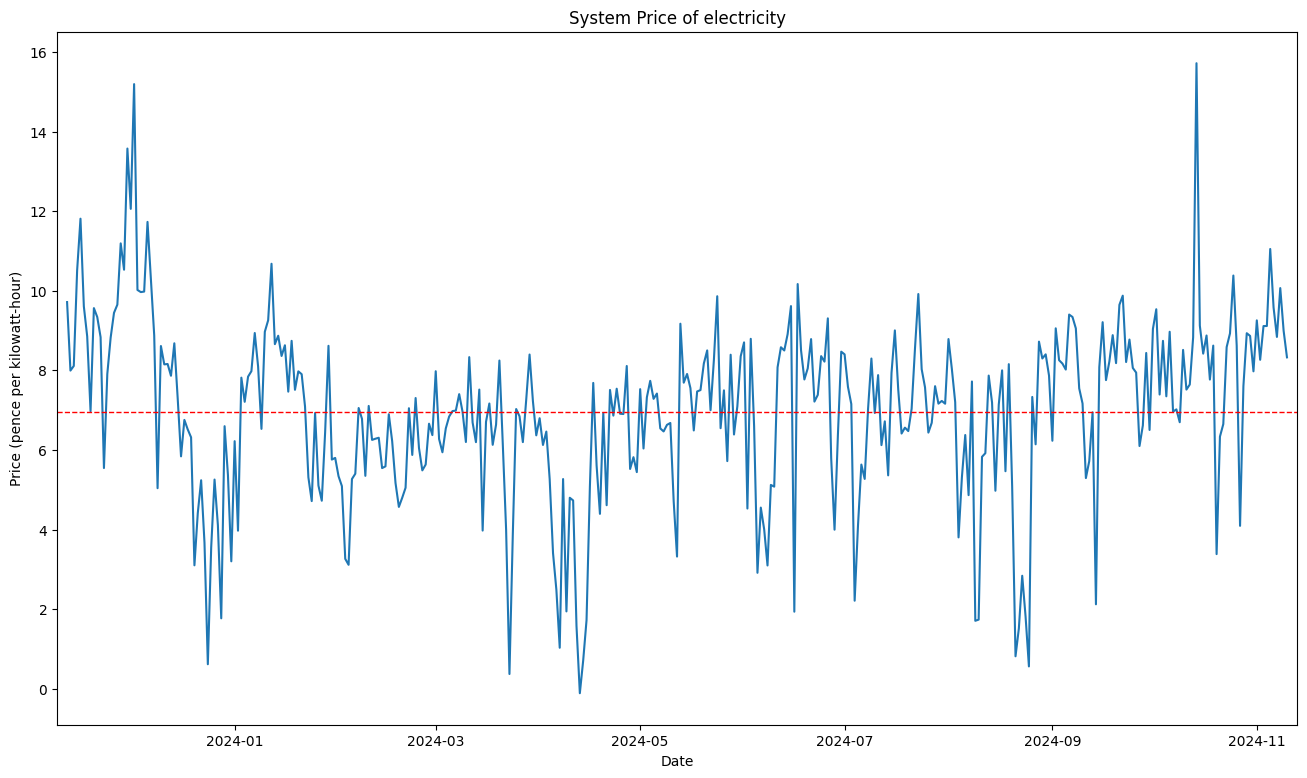

In [89]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(df.index.values[-365:], df['Daily Average'].values[-365:])
ax.set_xlim(19670, 19670+370)
ax.set_xlabel("Date")
ax.set_ylabel("Price (pence per kilowatt-hour)")
ax.set_title("System Price of electricity")

ax.axhline(y=average_price, color='red', linestyle='--', linewidth=1)

plt.show()